# Exploratory data analysis on Olympics Games

**Content**

Goal is to explore a dataset on the modern summer Olympic Games, from Athens 1896 to Rio 2016 and try to find hidden patterns, actionable insights from dataset.

1. Year - Year in which event took place
2. City - City where event took place
3. Sport - Sport category
4. Discipline - Discipline category
5. Athlete - Athlete's name
6. Country - Winning Country
7. Gender - Male or Female athelete
8. Event - Sport event
9. Medal - Winning medal Gold,Silver,Bronze

The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event. Source of this file : https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results We will be also making use of noc_regions.csv file to rename country names from the same source. GDP data and 2017 world happiness index from https://www.kaggle.com/unsdsn/world-happiness, we can also use these to see any relevant insights.

We will use these 4 datasets as supportive objects.

# Index of Content

1. Importing the modules.
2. Data importing.
3. Collecting information about the two dataset.
4. Joining the dataframes.
5. Genderwise competitive index.
6. Participants and winners in Summer Olympics.
7. Medals per country.
8. Olympic performance variation with Economic progress of nation.
9. Olympics performance variations with its Happiness index.
10. Countrywise participation.
11. Heatmap of yearwise sports.
12. Indians at Olympis
13. Genderwise medals by India
14. Yearwise medals by India
15. Conclusions.

# 1. Importing teh Modules

In [1]:
# For data maipulation 
import numpy as np
import pandas as pd

# For data visualization 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 2. Importing data to Python environment

In [52]:
# Importing primary data
primary_data = pd.read_csv('summer_olympics.csv')

In [53]:
# Importing supportive data
regions = pd.read_csv('noc_regions.csv')

In [54]:
#Importing supportive data
gdp = pd.read_csv('gdp_data.csv')

In [55]:
#Importing supportive data
happiness = pd.read_csv('2017_happiness.csv')

In [56]:

#Importing supportive data
host = pd.read_csv('olym_host.csv')

In [57]:
#Importing supportive data

athlete_data = pd.read_csv('athlete_events.csv')


In [58]:
# #Kindly Wait for below function to show output
# athlete_data.head(10)

In [74]:
# print(primary_data.head(),regions.head(),gdp.head(),happiness.head(),host.head(),athlete_data.head())

# 3. Collecting and refining the informtion

We are going to:

1. Review the Few lines of the data;
2. Use the describe and info functions to collect statistical information, datatypes, column names and other information.
3. Check null values and its impact on analysis. Drop them if necessary.

In [75]:
# primary_data.head(5)

In [76]:
# primary_data.describe(include = 'all')

In [77]:
# primary_data.Year.unique()

In [78]:
# primary_data.info()

In [79]:
#Defining a disctionary whey Key = Column name, Value = data type in which it needs to be converted
dtype_dict = {"City":"category","Sport":"category","Discipline":"category","Athlete":"category","Discipline":"category","Country":"category","Gender":"category","Event":"category","Medal":"category"}

# Converting data types 
primary_data = primary_data.astype(dtype_dict)
# primary_data.info()

In [80]:
# primary_data.isnull().sum()

In [81]:
# primary_data[pd.isnull(primary_data.Country)]

In [82]:
# Dropping the null values
primary_data.dropna(inplace =  True)
# primary_data.shape

In [83]:
# host.head()

In [84]:
# regions.head()

In [85]:
region_temp = regions.copy()
# region_temp.head()

In [86]:
#Dropping unnecessary data 
region_temp.drop(columns = 'notes', inplace=True)
# region_temp.head()

In [87]:
modified_primary_data = primary_data.copy()
modified_primary_data.rename(columns = {"Country":"NOC"}, inplace = True)

#Modifying primary data 
modified_primary_data = pd.merge(left = modified_primary_data, right=region_temp, on ="NOC", how="left")

# modified_primary_data.head()

modified_primary_data.rename(columns = {'region':'Winning Country'}, inplace=True)
# modified_primary_data.head()

In [88]:
# Making changes to permanant to primary data 
primary_data = modified_primary_data
# primary_data.shape
# primary_data

# 5. Competitive index among gender

In [89]:
# Loading dataframe in temporary variable 
winners = primary_data.copy()


#Male winners 
male_winners = winners[winners.Gender == 'Men']
winner_male = male_winners.Year.value_counts().sort_index()
winner_male = pd.DataFrame(winner_male)

#Female winners 
female_winners = winners[winners.Gender == 'Women']
winner_female = female_winners.Year.value_counts().sort_index()
winner_female = pd.DataFrame(winner_female)

#Resetting Indices
winner_male.reset_index(level=0, inplace = True)
winner_female.reset_index(level=0, inplace = True)


#Renaming column headings for merging purpose
winner_male.rename(columns = {"index":"Year", "Year":"Male Winners"}, inplace=True)
winner_female.rename(columns = {"index":"Year", "Year":"Female Winners"}, inplace=True)


#Merging both data
all_winners_stats = pd.merge(left = winner_male, right = winner_female, how= "left", on="Year")
all_winners_stats.set_index("Year", inplace=True)
# all_winners_stats.head()

In [90]:
#Loading CSV into DataFrame object
participants = athlete_data
# participants.head()
#Extracting part of DataFrame by Sex(column) and sorted in ascending order by Year
#Male participants
male_participants = participants[participants.Sex == "M"]
participants_male = male_participants.Year.value_counts().sort_index()
participants_male = pd.DataFrame(participants_male)

#Female Participants
female_participants = participants[participants.Sex == "F"]
participants_female = female_participants.Year.value_counts().sort_index()
participants_female = pd.DataFrame(participants_female)

#Resetting indices
participants_male.reset_index(level=0, inplace=True)
participants_female.reset_index(level=0, inplace=True)

#Renaming column headings for merging dataframes
participants_male.rename(columns = {"index":"Year", "Year":"Male Participants"}, inplace=True)
participants_female.rename(columns = {"index":"Year", "Year":"Female Participants"}, inplace=True)

#Joining the data
all_participants_stats = pd.merge(left = participants_male, right= participants_female, how= 'left', on = 'Year')
# all_participants_stats.head()

In [91]:
# Merging all winner stats and participants stats together
all_stats = pd.merge(left = all_winners_stats, right=all_participants_stats, how='left', on='Year')
# all_stats.head()

In [92]:
#Male competition index
all_stats["Male Competition Index"] = all_stats["Male Winners"]/all_stats["Male Participants"]

#Female competition index
all_stats["Female Competition Index"] = all_stats["Female Winners"]/all_stats["Female Participants"]

#Overall competiton index
all_stats["Overall Competiton Index"] = (all_stats["Male Winners"]+all_stats["Female Winners"])/(all_stats["Male Participants"]+all_stats["Female Participants"])


# all_stats.head()

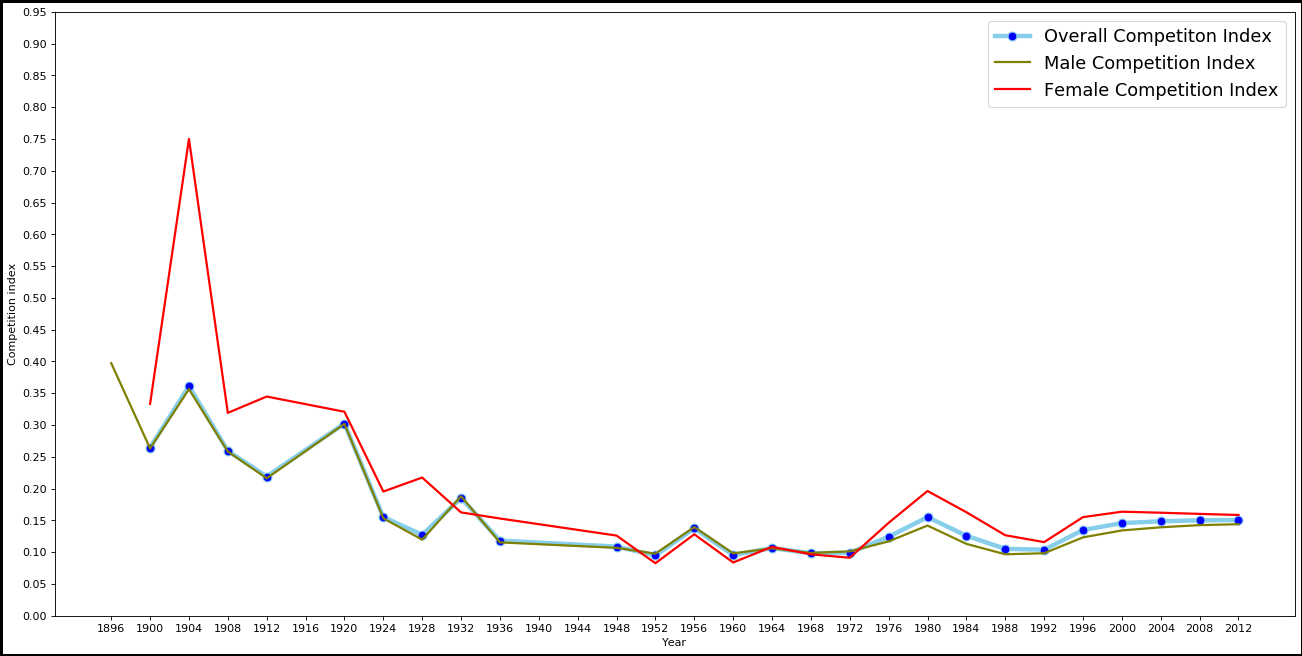

In [51]:
#Defining size, background color, edge color, resolution of the plot
line_graph = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black', linewidth=3)

#Plotting X axis as Year and Y axis as competition indices
plt.plot('Year', 'Overall Competiton Index', data=all_stats, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot('Year', 'Male Competition Index', data=all_stats, marker='', color='olive', linewidth=2)
plt.plot('Year', 'Female Competition Index', data=all_stats, marker='', color='red', linewidth=2)

#Defining scale on X and Y axes
plt.xticks(np.arange(1896, 2015, 4))
plt.yticks(np.arange(0, 1, 0.05))

#Fine tuning legends and axis labels
plt.legend(prop={'size':16})
plt.xlabel("Year")
plt.ylabel("Competition index")
plt.show()

#Saving generated plot as JPG image
#line_graph.savefig('test.jpg')

Lesser the value of competition index simply means more individuals are participating, which also means increased competition.

From the plot above, we can observe that competition index for men and overall index trend is going hand in hand. But for Females, it is quite cluttery

This trend was affected by number of factors. World war I and II for instance in 1910 and 1940 respectively.

For females born in countries that has to abide by cultural rules, might not get any chance to participate in the olympics. 

The trend have had its ups and downs. A single global economical, political or even geographical event can produce butterfly effects on unimaginable scales at International Olympics levels. It is so chaotic that we can never predict its future state properly.

What can be the reason for increasing competition levels ? Rapid growth of human population in 20th century is definetely one of the reason. Rapid economic, growth in technology can also be one of the reasons.

Let us analyze more data to come to the proper conclusion.

# 6. Participants and winner in Olympics

In [95]:
#Extracting only Male winners
male_olympics = primary_data[primary_data.Gender == 'Men']
# male_olympics.head()

#Extracting only female winners
female_olympics = primary_data[primary_data.Gender == 'Women']
# female_olympics.head()

In [96]:
#Extract the seasons
seasons = athlete_data['Season'].unique()
#seasons

#Extracting only Male participants
male_in_olympics_summer = athlete_data[(athlete_data.Sex == 'M')  &  (athlete_data.Season == 'Summer')]


# male_in_olympics_summer.head()


#Extracting only Female Participants
female_in_olympics_summer = athlete_data[(athlete_data.Sex == 'F')  &  (athlete_data.Season == 'Summer')]


# female_in_olympics_summer.head()




Text(0.0, 1.0, 'Male winners per olympics edition')

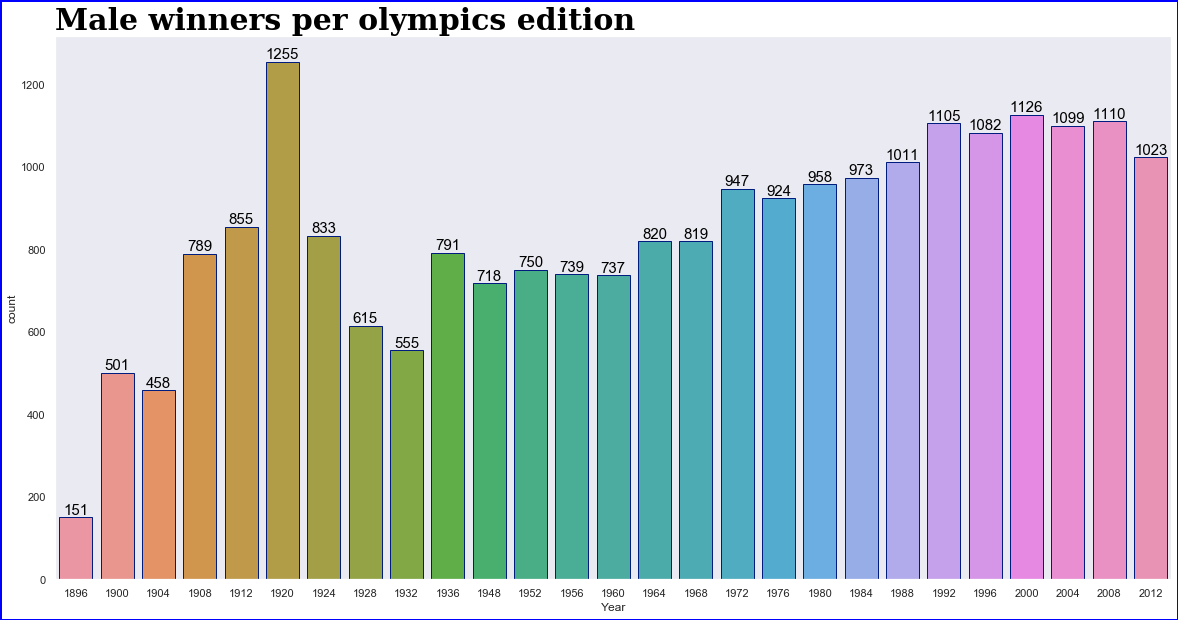

In [97]:
#Setting background styles 
sns.set(style='dark')


#Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor='blue', linewidth=3)

#Creating plot
male_winners = sns.countplot(x='Year', data=male_olympics, edgecolor=sns.color_palette("dark", 1))


#Adding value labels to plot 
for patch in male_winners.patches:
    male_winners.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '%d' % int(patch.get_height()),
                      fontsize = 15, color = 'black', ha='center', va='bottom')
    
#manipulating title visuals
titlefont = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 30}
plt.title('Male winners per olympics edition', fontdict = titlefont, loc='left')


Text(0.0, 1.0, 'Male participants per summer olympics edition')

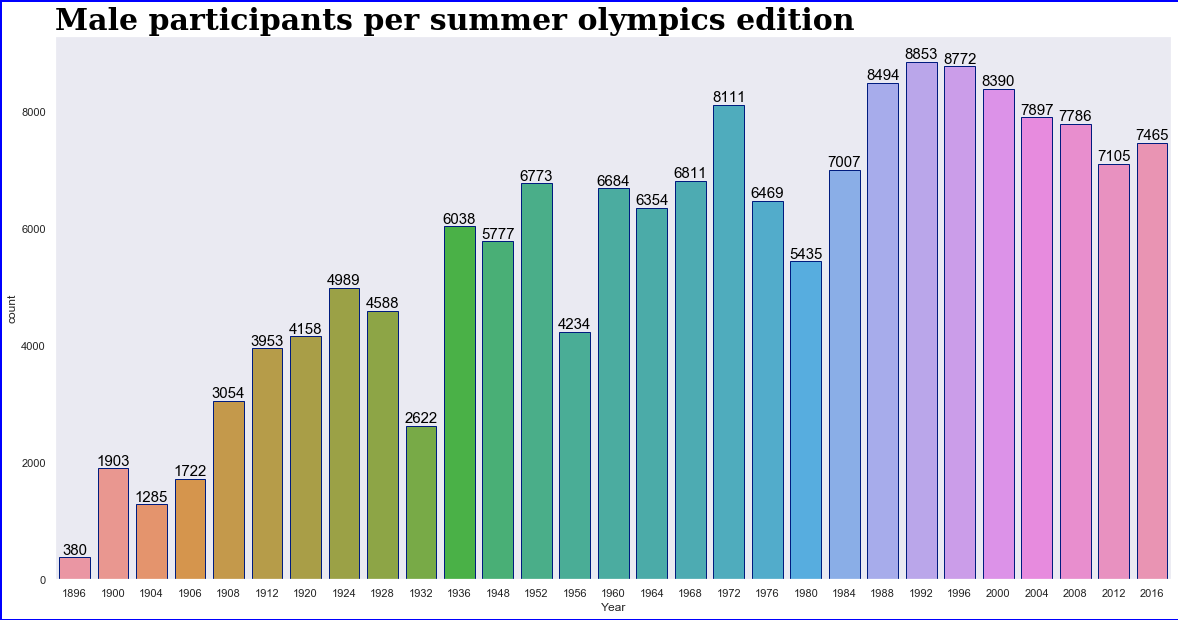

In [48]:
#Setting background styles 
sns.set(style='dark')


#Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor='blue', linewidth=3)

#Creating plot
male_participants = sns.countplot(x='Year', data=male_in_olympics_summer, edgecolor=sns.color_palette("dark", 1))


#Adding value labels to plot 
for patch in male_participants.patches:
    male_participants.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '%d' % int(patch.get_height()),
                      fontsize = 15, color = 'black', ha='center', va='bottom')
    
#manipulating title visuals
titlefont = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 30}
plt.title('Male participants per summer olympics edition', fontdict = titlefont, loc='left')


Text(0.0, 1.0, 'Female winners per olympics edition')

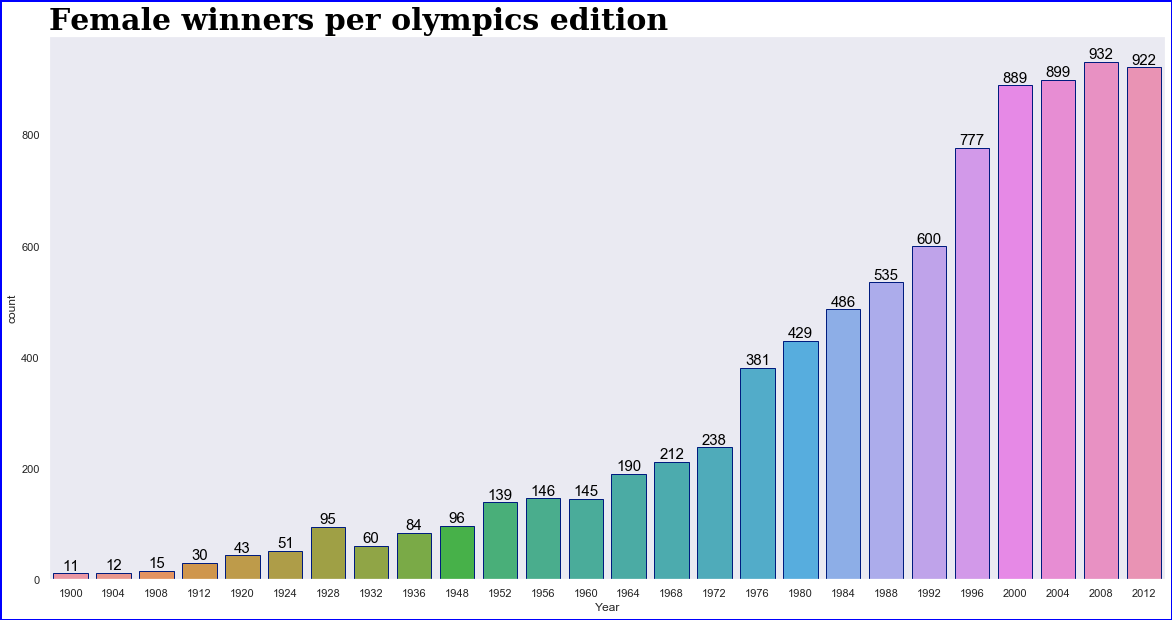

In [98]:
#Setting background styles 
sns.set(style='dark')


#Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor='blue', linewidth=3)

#Creating plot
female_winners = sns.countplot(x='Year', data=female_olympics, edgecolor=sns.color_palette("dark", 1))


#Adding value labels to plot 
for patch in female_winners.patches:
    female_winners.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '%d' % int(patch.get_height()),
                      fontsize = 15, color = 'black', ha='center', va='bottom')
    
#manipulating title visuals
titlefont = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 30}
plt.title('Female winners per olympics edition', fontdict = titlefont, loc='left')


Text(0.0, 1.0, 'Female participants per summer olympics edition')

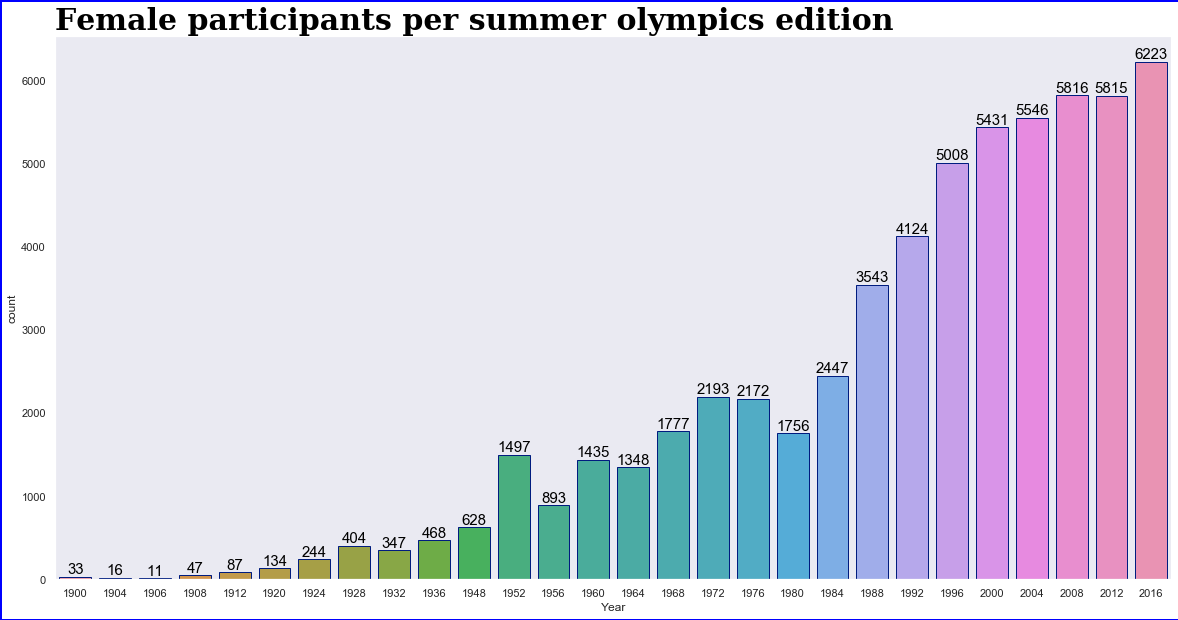

In [99]:
#Setting background styles 
sns.set(style='dark')


#Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor='blue', linewidth=3)

#Creating plot
female_participants = sns.countplot(x='Year', data=female_in_olympics_summer, edgecolor=sns.color_palette("dark", 1))


#Adding value labels to plot 
for patch in female_participants.patches:
    female_participants.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '%d' % int(patch.get_height()),
                      fontsize = 15, color = 'black', ha='center', va='bottom')
    
#manipulating title visuals
titlefont = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 30}
plt.title('Female participants per summer olympics edition', fontdict = titlefont, loc='left')


Done. Let's now review our work:

We can see both participation of athletes as well as winning medals have been on increasing trend since the beginning.

We can observe a decrease in winner and participants tally in 1932 olympics. Wonder what made it like that ?

In 1932, the Olypmics was held in Los Angeles. The overall cost and expense to sponsor athletes/particiants to compete was steep. So, only selected few were sent.

Well, that explains the plot as lesser participants were there.

# 7. Medal per country

Let us use Pareto analysis for the top 20 countries also known as 80/20 rule

In [100]:
#Creating a data frame about medals won per country
# primary_data.head()
totalMedals = pd.DataFrame(primary_data['Winning Country'].value_counts())
totalMedals.head()

#Adding column to dataframe for pareto analysis
totalMedals['cumsum %'] = totalMedals["Winning Country"].cumsum()/totalMedals["Winning Country"].sum()*100
totalMedals = totalMedals.head(30)

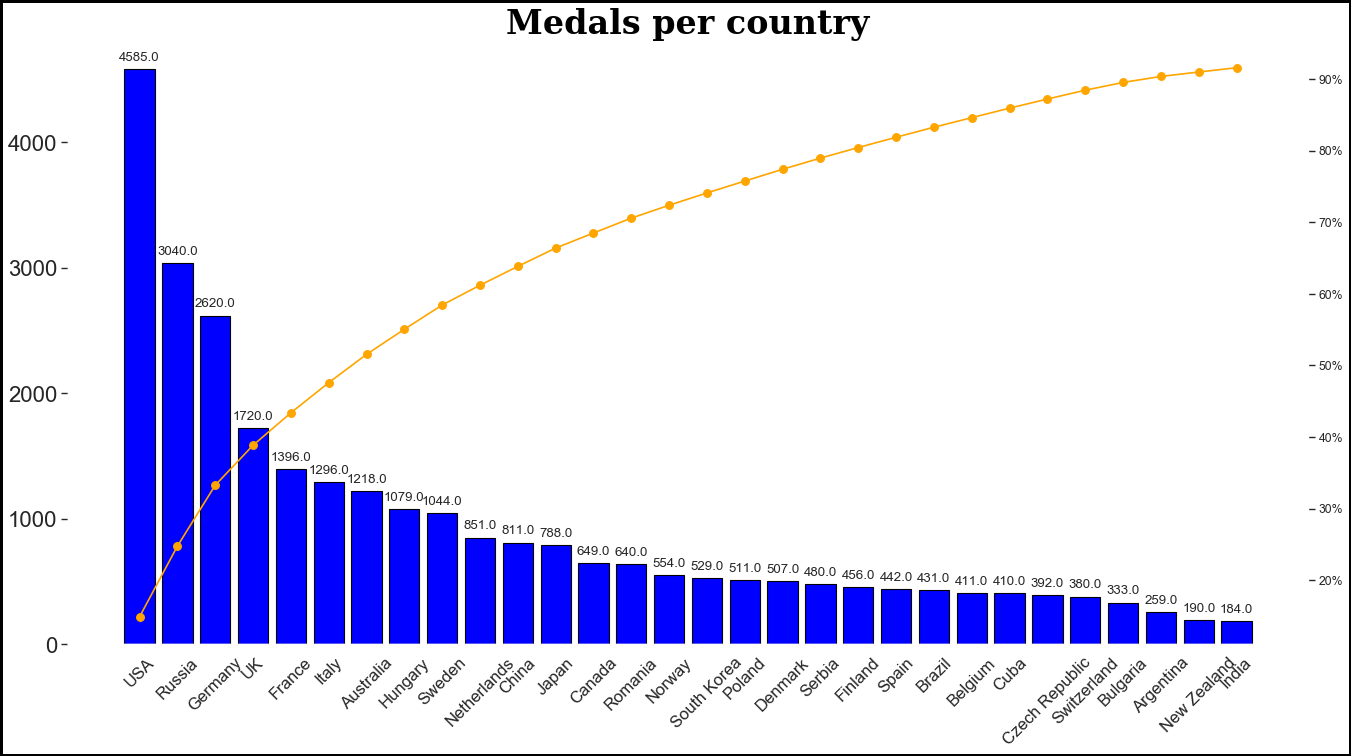

In [101]:
fig = plt.figure(num = None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black', linewidth=3)

ax = fig.add_subplot()
plt.grid(b=None)
ax.set_facecolor("white")

ax.bar(totalMedals.index, totalMedals['Winning Country'], color='blue', width=0.8, edgecolor='black', linewidth=1)
ax2 = ax.twinx()
ax2.plot(totalMedals.index, totalMedals['cumsum %'], color='orange', marker='o', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize = 15, labelrotation=45)

#Adding labels to end of the each bar

def add_value_labels(ax, spacing=5):
     
        # For each bar: Place a label
        
        for rect in ax.patches:
            #Getting X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
            
            # Number of points between bar and label.
            
            space = spacing 
            
            # Vertical alignment for positive values
            va = 'bottom'
            
            #If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place the label below
                space *= -1
                # Verticall alignment for positive values
                va = 'top'
                
                
            #Use Y value as label and format number with one decimal place
            label = "{:.1f}".format(y_value)
                
            #Create annotation
            ax.annotate(
            label,                        # Use 'label' as label
            (x_value, y_value),           # Place label at the end of the bar
            xytext = (0, space),          # Vertically shift label by 'space'
            textcoords="offset points",   # Interpret 'xytext' as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently-
                                          #- for positive and negative values.
            
            
# Call the function above. All the magic happens here
add_value_labels(ax)
plt.title('Medals per country', fontdict = titlefont, loc = 'center')
plt.show()

            

The USA seems to have most number of winning medals.

Our Pareto analysis says that 80% of medlas have been consumed my top 20 countries. 

Another insight is All the top 5 countries had fair shares in wars in 20th Century

# 8. Olymic performance variation with Economic progress of nation

GDP of a nation determines the dominating power at global economic level. Can GDP affect number of winners produced by a nation?

Generally, greater the GDP of a nation, more benefits for the citizens of that nation from the government.

Might this be enough to aid one become Olympics elite?

Let us analyze USA in this terms

In [106]:
#Making dataframe
usa = primary_data[(primary_data.NOC == 'USA') & (primary_data.Year > 1959)]
# usa.head()

#Making winning trend dataframe
usa_winning_trend = pd.DataFrame(usa.Year.value_counts())
# usa_winning_trend.head()

#Sorting by year
usa_winning_trend.sort_index(inplace= True)
usa_winning_trend.reset_index(inplace = True)

#Renaming columns
usa_winning_trend.rename(columns={"index":"Year", "Year":"Medals trend"}, inplace = True)
# usa_winning_trend.head()

,Year,Medals trend
0,1960,112
1,1964,150
2,1968,149
3,1972,155
4,1976,155


In [107]:
gdp.head()

,Country,Code,Year,GDP-Growth,GDP-Per-Capita,GDP
0,Aruba,ABW,1960,NaN,NaN,NaN
1,Afghanistan,AFG,1960,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,NaN


In [113]:
#Years when the olympics happened 
options = primary_data.Year.unique()
# options

#Limiting data to spcific years
usa_gdp_trend = gdp[(gdp.Code == 'USA') & (gdp.Year.isin(options))]
usa_gdp_trend = usa_gdp_trend[["Year", "GDP"]].copy()
usa_gdp_trend.head()

,Year,GDP
249,1960,3.441682e+12
1305,1964,4.307727e+12
2361,1968,4.758687e+12
3417,1972,5.436462e+12
4473,1976,6.313128e+12


In [118]:
#Merging dataframe
usa_medal_gdp = pd.merge(left= usa_winning_trend, right=usa_gdp_trend, how="left", on="Year")
usa_medal_gdp.set_index("Year", inplace = True)
usa_medal_gdp

,Medals trend,GDP
Year,,
1960,112,3.441682e+12
1964,150,4.307727e+12
1968,149,4.758687e+12
1972,155,5.436462e+12
1976,155,6.313128e+12
1984,333,7.906433e+12
1988,193,9.001231e+12
1992,224,9.949783e+12
1996,260,1.157006e+13



The scales of both columns is vastly different. To plot graphs from this data, we will try to Normalise GDP values to Y axis scale.

Normalization is done by multiplying each GDP value by average of total medals won by Country and divided my maximum GDP

In [130]:
usa_medal_gdp.GDP = usa_medal_gdp.GDP*usa_medal_gdp["Medals trend"].mean()/usa_medal_gdp.GDP.max()
# usa_medal_gdp

,Medals trend,GDP
Year,,
1960,112,45.768949
1964,150,57.285979
1968,149,63.283035
1972,155,72.296370
1976,155,83.954646
1984,333,105.143103
1988,193,119.702185
1992,224,132.316430
1996,260,153.863617


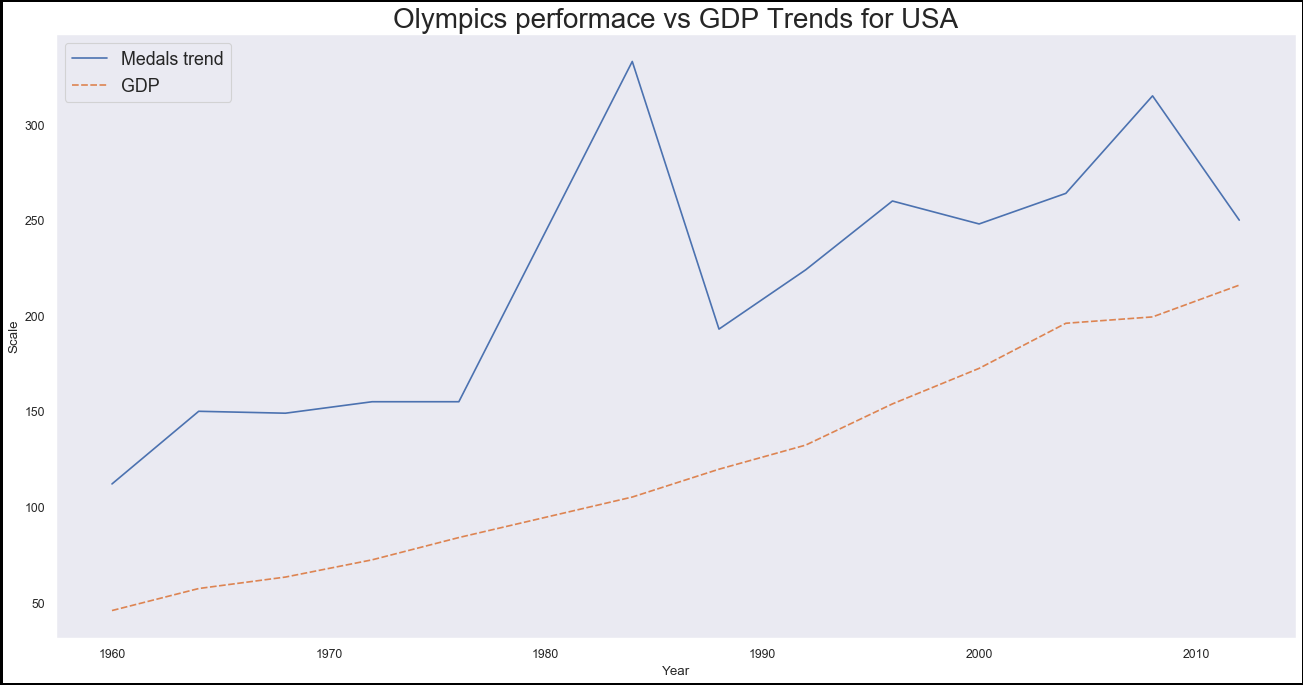

In [134]:
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black', linewidth=3)
sns.lineplot(data = usa_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size' : 16})
plt.xlabel('Year')
plt.ylabel("Scale")
plt.title("Olympics performace vs GDP Trends for USA", size=25)
plt.show()

The sudden spike in 1980s GDP of USA can be connected to massive growth in the tech industry that came when Computers started becoming a global personal entity.

Rest, since both trends are going upwards, we can conclude that GDP indeed played an important role in the sporting performace.

Let us try to find out similar analysis about Germany and France to confirm the hypothesis whether the GDP really has something to do with the growth of the sporting field.

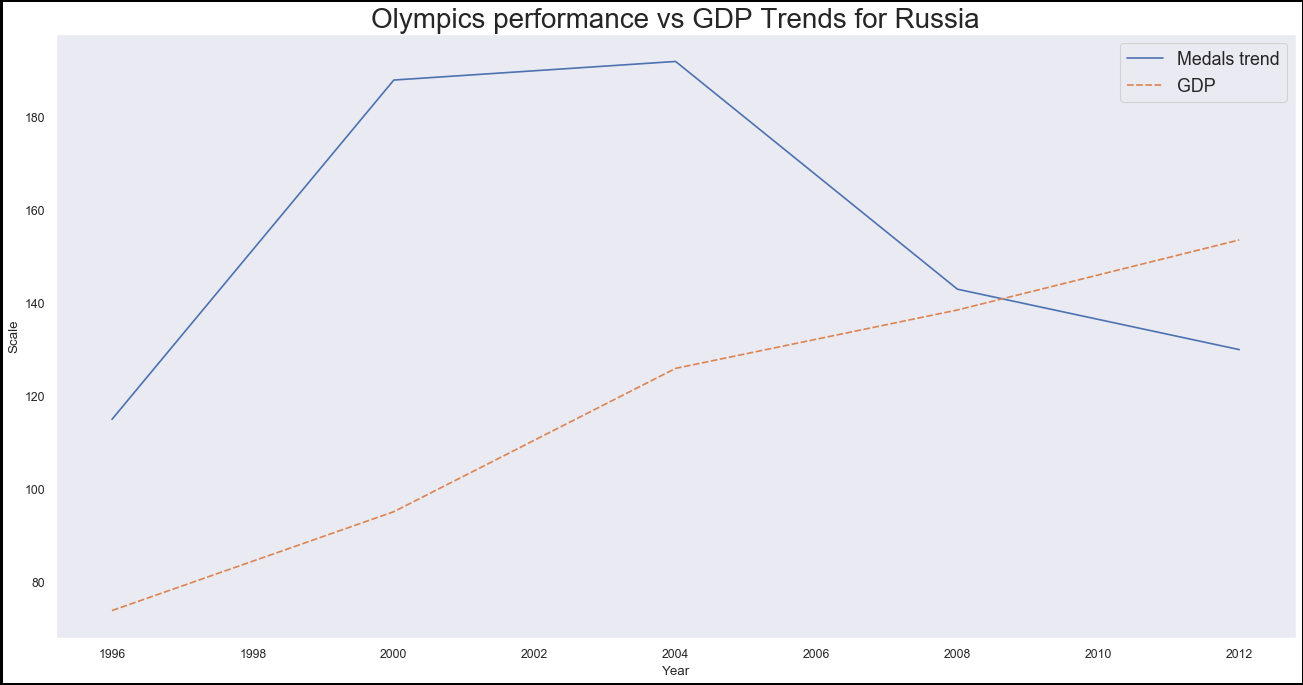

In [178]:
#Making dataframe
rus = primary_data[(primary_data.NOC == "RUS") & (primary_data.Year >1959)]
#Making winning trend datagbrme
rus_winning_trend = pd.DataFrame(rus.Year.value_counts())

#Sorting by Year
rus_winning_trend.sort_index(inplace = True)
rus_winning_trend.reset_index(inplace = True)

#Renaming columns
rus_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)

#Limiting data to specific years
rus_gdp_trend = gdp[(gdp.Code == "RUS") & (gdp.Year.isin(options))]
rus_gdp_trend = rus_gdp_trend[["Year","GDP"]].copy()

#Merging datagbrme
rus_medal_gdp = pd.merge(left = rus_winning_trend, right = rus_gdp_trend, on = "Year" )
rus_medal_gdp.set_index("Year",inplace = True)

#Dividing GDP values by maximum of them and multiplying by maximum medal count in DataFrame to match Y axis scale
rus_medal_gdp.GDP = rus_medal_gdp.GDP*rus_medal_gdp["Medals trend"].mean()/rus_medal_gdp.GDP.max()

#Plotting graph
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = rus_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends for Russia",size =25)
plt.show()

As expected, no insights can be drawn from Russian GDP and Medals trend. Primary reason being, the recent political events came through game changing decisions by Mikhail Gorbachev, the last president of Soviet Union.

In [183]:
#Making dataframe
ger = primary_data[(primary_data.NOC == "GER") & (primary_data.Year > 1959)]

#Making winning trend dataframe
ger_winning_trend = pd.DataFrame(ger.Year.value_counts())

#Sorting by year
ger_winning_trend.sort_index(inplace=True)
ger_winning_trend.reset_index(inplace=True)

#Renaming the columns 
ger_winning_trend.rename(columns={"index":"Year", "Year":"Medals trend"}, inplace=True)

# print(ger_winning_trend)
gdp.head()
#Limiting data based on specific year
ger_gdp_trend = gdp[(gdp.Code == "GER") & (gdp.Year.isin(options))]
ger_gdp_trend = ger_gdp_trend[["Year", "GDP"]].copy()

#Merging the data
ger_medal_gdp = pd.merge(left=ger_winning_trend, right=ger_gdp_trend, on="Year")
ger_medal_gdp.set_index("Year", inplace= True)

ger_medal_gdp

# #Normalizing the GDP data
# ger_medal_gdp.GDP = ger_medal_gdp.GDP*ger_medal_gdp["Medals trend"].mean()/ger_medal_gdp.GDP.max()

# #Plotting the graph
# fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor="w", edgecolor="black", linewidth=3)
# sns.lineplot(data=ger_medal_gdp)

# #Labelling the plot
# plt.legend(prop={"size":16})
# plt.xlabel("Year")
# plt.ylabel("Scale")
# plt.title("Olympics performace vs GDP trends for Germany")
# plt.show()


Empty DataFrame
Columns: [Medals trend, GDP]
Index: []


 There is very less data regarding Germany. Again World War I takes all the blame

Apparantely, Germany and Japan was banned dfrom participating in Olympics because of numerous damages they did in 1940s

Let us move to United Kingdom

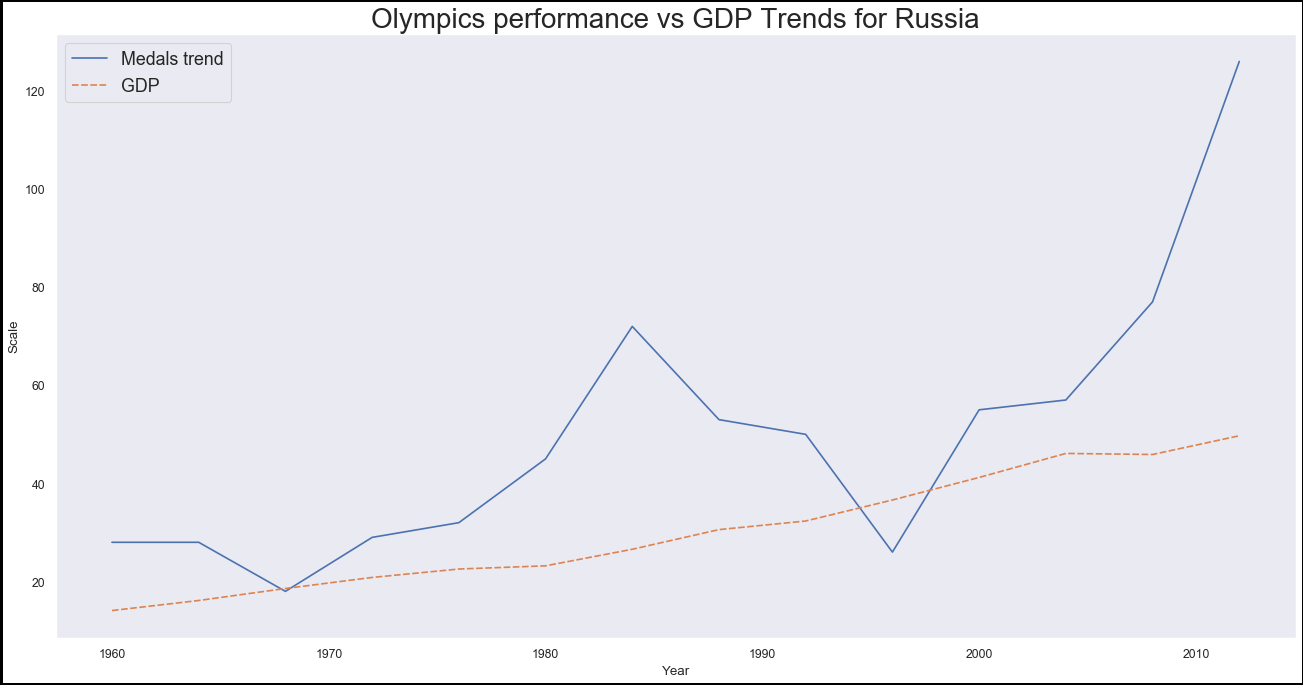

In [186]:
#Making dataframe
uk = primary_data[(primary_data.NOC == "GBR") & (primary_data.Year >1959)]
#Making winning trend datagbrme
uk_winning_trend = pd.DataFrame(uk.Year.value_counts())

#Sorting by Year
uk_winning_trend.sort_index(inplace = True)
uk_winning_trend.reset_index(inplace = True)

#Renaming columns
uk_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)

#Limiting data to specific years
uk_gdp_trend = gdp[(gdp.Code == "GBR") & (gdp.Year.isin(options))]
uk_gdp_trend = uk_gdp_trend[["Year","GDP"]].copy()

#Merging datagbrme
uk_medal_gdp = pd.merge(left = uk_winning_trend, right = uk_gdp_trend, on = "Year" )
uk_medal_gdp.set_index("Year",inplace = True)

#Dividing GDP values by maximum of them and multiplying by maximum medal count in DataFrame to match Y axis scale
uk_medal_gdp.GDP = uk_medal_gdp.GDP*uk_medal_gdp["Medals trend"].mean()/uk_medal_gdp.GDP.max()

#Plotting graph
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = uk_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends for United Kingdom",size =25)
plt.show()

Well looking at the plot we can not get more insights as the gdp is increasing in case of United Kingdom we can conclude that GDP played a good role to support the olympics, well this may not be 100% true but still we can correlate.

Let us look at next country France

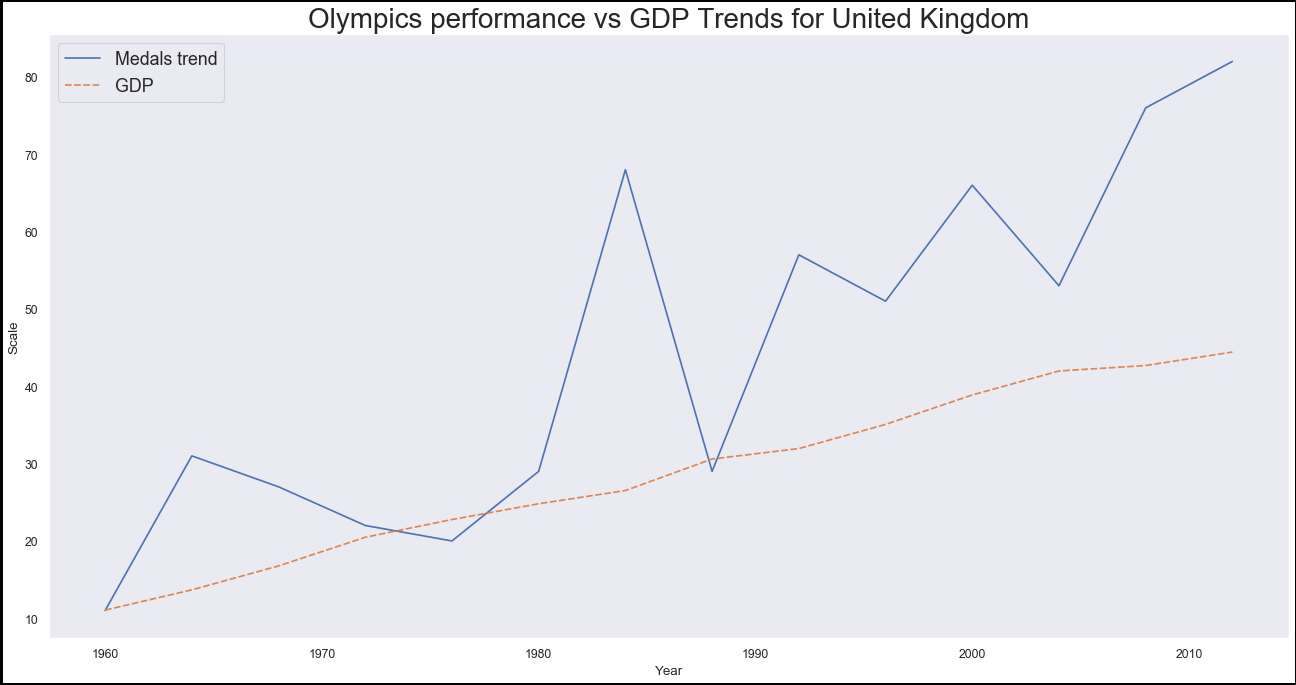

In [188]:
#Making dataframe
fra = primary_data[(primary_data.NOC == "FRA") & (primary_data.Year >1959)]
#Making winning trend datagbrme
fra_winning_trend = pd.DataFrame(fra.Year.value_counts())

#Sorting by Year
fra_winning_trend.sort_index(inplace = True)
fra_winning_trend.reset_index(inplace = True)

#Renaming columns
fra_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)

#Limiting data to specific years
fra_gdp_trend = gdp[(gdp.Code == "FRA") & (gdp.Year.isin(options))]
fra_gdp_trend = fra_gdp_trend[["Year","GDP"]].copy()

#Merging datagbrme
fra_medal_gdp = pd.merge(left = fra_winning_trend, right = fra_gdp_trend, on = "Year" )
fra_medal_gdp.set_index("Year",inplace = True)

#Dividing GDP values by maximum of them and multiplying by maximum medal count in DataFrame to match Y axis scale
fra_medal_gdp.GDP = fra_medal_gdp.GDP*fra_medal_gdp["Medals trend"].mean()/fra_medal_gdp.GDP.max()

#Plotting graph
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = fra_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends for France",size =25)
plt.show()

Looking at this we can not 100% prove that GDP might be the only one reason for the increasing winners for each of the country, It is similar to the above plots.

# 9. Olympics performance variations with its happiness index

In [192]:
top_country = totalMedals.copy()
top_country.reset_index(inplace = True)
top_country.rename(columns={"index":"Country"}, inplace = True)
top_country = pd.DataFrame(top_country.Country.copy())
top_country["Rank"] = top_country.index + 1
top_country.head()

,Country,Rank
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


In [195]:
# print(happiness.head())
happy_country = pd.DataFrame(happiness["Country"].copy().head(30))
happy_country["Rank"] = happy_country.index + 1

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

Let us manually check the 30 Country names as there seems to be issue related to Data. Let's fix this by renaming those values.

In [199]:
top_country.replace(["USA", "UK"], ["United States", "United Kingdom"], inplace=True)
top_country.head()

,Country,Rank
0,United States,1
1,Russia,2
2,Germany,3
3,United Kingdom,4
4,France,5


In [203]:
merged_data = pd.merge(left= top_country, right=happy_country, on="Country")
merged_data.head()

,Country,Rank_x,Rank_y
0,United States,1,14
1,Germany,3,16
2,United Kingdom,4,19
3,Australia,7,10
4,Sweden,9,9


In [205]:
merged_data.rename(columns={"Rank_x":"Medal Rank", "Rank_y":"Happiness index Rank"}, inplace = True)
count = merged_data.Country.count() + 1
merged_data["Sr. No"] = range(1, count)
merged_data.set_index("Sr. No", inplace=True)
merged_data

,Country,Medal Rank,Happiness index Rank
Sr. No,,,
1,United States,1,14
2,Germany,3,16
3,United Kingdom,4,19
4,Australia,7,10
5,Sweden,9,9
6,Netherlands,10,6
7,Canada,13,7
8,Norway,15,1
9,Denmark,18,2


This is amazing, We can see many nations which have higher happiness index also have performed well in the olympics.

16 and 30 countries which perfomred well in Olympics also have happiness index in top 30. This is more than 50%, Well we can conclude that more happy the people of the country are, moe their performance in the Olympic games is better.

Our observations seems to be correct.